# **Simulasi Efek Doppler dengan Sumber Bergerak Melengkung**

---



Efek Doppler terjadi ketika frekuensi gelombang yang diterima pengamat berubah akibat gerakan relatif antara sumber dan pengamat. Pada simulasi
ini, sumber bunyi memiliki frekuensi asli $f_0$ dan bergerak pada lintasan dua dimensi berupa setengah lingkaran dengan jari-jari $R$. Sehingga posisi sumber sebagai fungsi waktu adalah

$x(t) = R\cos\left(\frac{\pi t}{T}\right)$

$y(t) = R\sin\left(\frac{\pi t}{T}\right)$

dengan $T$ sebagai total durasi simulasi.

Untuk menentukan frekuensi yang diterima pengamat, hanya komponen kecepatan sumber yang searah dengan garis sumber–pengamat yang berpengaruh, yaitu kecepatan radial

$v_{\text{rad}}(t) = \vec{v}(t)\cdot\hat{r}(t)$

dengan $\hat{r}(t)$ adalah vektor satuan dari sumber menuju pengamat.

Kecepatan sumber dihitung menggunakan persamaan :

$\vec{v}_i \approx \dfrac{\vec{r}_i -\vec{r}_{i-1}}{\Delta t}$

Sehingga frekuensi teramati pada setiap waktu adalah

$f'(t)= f_0\,\frac{v}{v - v_{\text{rad}}(t)}$

dengan $v$ sebagai laju rambat bunyi diudara.



/tmp/ipython-input-1046513491.py:31: RuntimeWarning: invalid value encountered in divide
  r_hat[i] = r / np.linalg.norm(r)


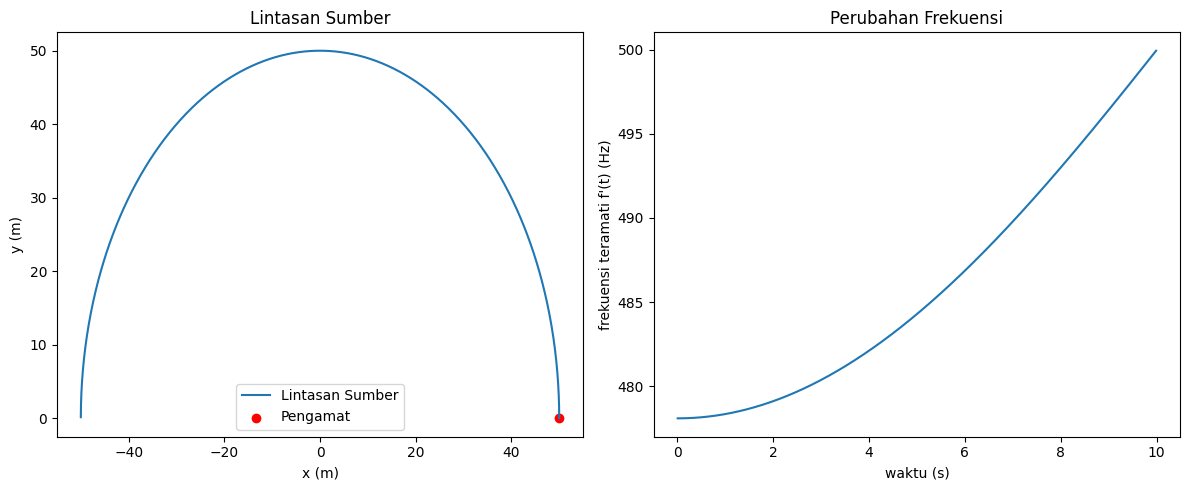

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Diketahui
f0 = 500            # Frekuensi asli (Hz)
c = 343             # Kecepatan suara (m/s)
R = 50              # jari-jari lintasan
obs = np.array([50, 0.0]) # Posisi pengemat

dt = 0.01
T = 10
t = np.arange(0, T, dt)

# Lintasan sumber (persamaan lingkaran dalam koordinat polar)
x = R * np.cos(np.pi * t / T )
y = R * np.sin(np.pi * t / T )

# Kecepatan sumber
vx = np.zeros_like(t)
vy = np.zeros_like(t)

for i in range(1, len(t)):
    vx[i] = (x[i] - x[i-1]) / dt
    vy[i] = (y[i] - y[i-1]) / dt

# Vektor arah menuju pengamat, r = arah + jarak, r_hat = arah saja
r_hat = np.zeros((len(t), 2))

for i in range(len(t)):
    r = obs - np.array([x[i], y[i]])
    r_hat[i] = r / np.linalg.norm(r)

# Kecepatan radial
v_rad = np.zeros_like(t)

for i in range(len(t)):
    v_vec = np.array([vx[i], vy[i]])
    v_rad[i] = np.dot(v_vec, r_hat[i])

# Frekuensi teramati
f_obs = f0 * (c / (c - v_rad))

plt.figure(figsize=(12,5))

# Plot lintasan
plt.subplot(1,2,1)
plt.plot(x, y, label="Lintasan Sumber")
plt.scatter(obs[0], obs[1], color='red', label="Pengamat")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Lintasan Sumber")
plt.legend()

# Plot frekuensi teramati
plt.subplot(1,2,2)
plt.plot(t, f_obs)
plt.xlabel("waktu (s)")
plt.ylabel("frekuensi teramati f'(t) (Hz)")
plt.title("Perubahan Frekuensi")

plt.tight_layout()
plt.show()

**Grafik lintasan sumber** menunjukkan sumber bunyi bergerak mengikuti setengah lintasan lingkaran: berawal dari kiri bawah, naik ke puncak, lalu turun mendekati pengamat di kanan bawah. Perubahan posisi dan arah gerak ini membuat jarak serta sudut sumber terhadap pengamat terus berubah sepanjang waktu.

---

**Grafik perubahan frekuensi** menunjukan frekuensi yang teramati, pada awalnya frekuensi teramati lebih rendah karena sumber secara radial menjauhi pengamat. Seiring sumber mendekati bagian akhir lintasan dan mulai bergerak turun ke arah pengamat, komponen kecepatan yang menuju pengamat meningkat, sehingga frekuensi teramati naik secara bertahap hingga mendekati kembali frekuensi asli $f_0$.


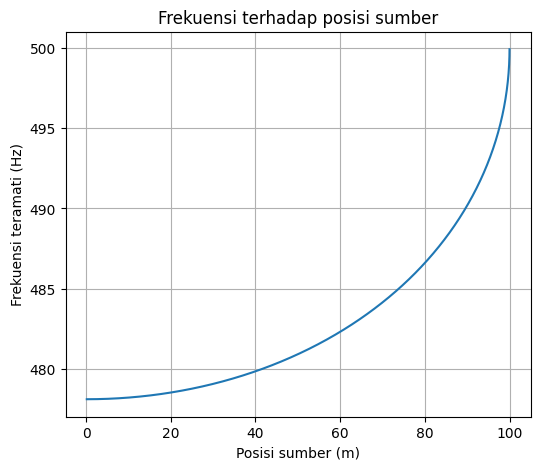

In [12]:
# Posisi sumber (x dan y)
r_total = np.sqrt((x - obs[0])**2 + (y - obs[1])**2)  # obs[0] = sumbu x, obs[1] = sumbu y

# Plot Frekuensi vs Posisi Total
plt.figure(figsize=(6,5))
plt.plot(r_total, f_obs)
plt.xlabel("Posisi sumber (m)")
plt.ylabel("Frekuensi teramati (Hz)")
plt.title("Frekuensi terhadap posisi sumber")
plt.grid(True)
plt.show()

**Grafik frekuensi terhadap sumber** menunjukan bahawa pada posisi 0 frekuensi yang didengar pengamat yaitu 477,5 Hz begitupun seterusnya. Posisi sumber merupakan total posisi pada sumbu x dan y dengan lintasan melengkung. Posisi sumber pada sumbu x dan y di peroleh dari persamaan

$$r_{\text{total}} = \sqrt{(x - \text{obs}[0])^2 + (y - \text{obs}[1])^2}$$

dengan x dan y adalah koordinat posisi sumber pada sumbu x dan y

sedangkan obs 0 adalah posisi pengamat pada sumbu x dan 0bs 1 adalah posisi pengamat pada sumbu y  